In [399]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller

In [431]:
data = pd.read_csv('./fit-data-alan.csv', index_col=0)
pop_data = pd.read_csv('./population-data.csv', index_col=0)

In [432]:
print(data)

                steps 
time                  
1623810207910    97509
1624415007910    77349
1625019807910    78948
1625624607910    51669
1626229407910    11529


In [433]:
data.head()

,steps
time,
1623810207910,97509
1624415007910,77349
1625019807910,78948
1625624607910,51669
1626229407910,11529


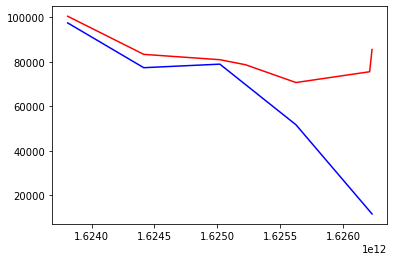

In [434]:
#data.plot()
plt.plot(data, color='blue', label='Individual Original Data')
plt.plot(pop_data, color='red', label='Population')

In [435]:
rolling_std = data.rolling(window=4).std()

In [436]:
plt.figure(figsize=(15,5))    

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

In [437]:
rolling_mean = data.rolling(window=4).mean()

In [438]:
print(rolling_mean)

                 steps 
time                   
1623810207910       NaN
1624415007910       NaN
1625019807910       NaN
1625624607910  76368.75
1626229407910  54873.75


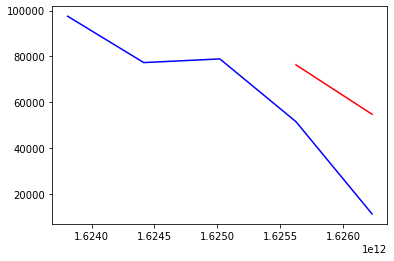

In [439]:
original = plt.plot(data, color='blue', label='Original')
mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
#std = plt.plot(rolling_std, color='black', label='Rolling Std')

In [440]:
adf_result = adfuller(data)

In [441]:
print(adf_result)

(0.8223733099262325, 0.991988864644435, 0, 4, {'1%': -7.355440625, '5%': -4.474365000000001, '10%': -3.1269325}, 91.18418779245924)


In [442]:
p_value = adf_result[1]
print(p_value)
# print('ADF Statistic: {}'.format(adf_result[0]))
# print('p-value: {}'.format(adf_result[1]))

0.991988864644435


In [443]:
p_value_threshold = 0.05

In [444]:
if p_value > p_value_threshold:
    isNonStationary = True

In [445]:
if isNonStationary:
    print('Non-stationary!')
    data_minus_mean = data - rolling_mean
    data_minus_mean.dropna(inplace=True)
    print(data_minus_mean)
    adf_result_stationary = adfuller(data_minus_mean)
    p_value_stationary = adf_result_stationary[1]
    print(p_value_stationary)
    original = plt.plot(data, color='blue', label='Original')
    mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
    original_minus_mean = plt.plot(data_minus_mean, color='black', label='Original - Rolling Mean')

Non-stationary!
                 steps 
time                   
1625624607910 -24699.75
1626229407910 -43344.75


ValueError: sample size is too short to use selected regression component

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index

                             ARIMA Model Results                              
Dep. Variable:              D. steps    No. Observations:                    4
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 -44.175
Method:                       css-mle   S.D. of innovations          15134.052
Date:                Fri, 16 Jul 2021   AIC                             94.349
Time:                        07:30:35   BIC                             92.508
Sample:                             1   HQIC                            90.309
                                                                              
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -2.153e+04   7994.668     -2.693      0.007   -3.72e+04   -5858.942
ar.L1.D. steps      0.0071      0.563      0.013      0.990      -1.097       1.111
                                

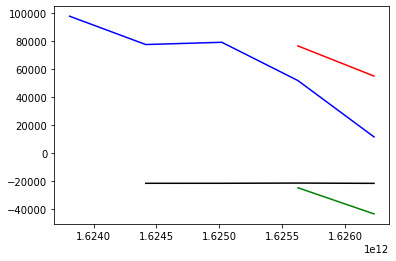

In [446]:
# model = ARIMA(data_minus_mean, order=(1, 0, 0))
model = ARIMA(data, order=(1, 1, 0))
results = model.fit()
#original = plt.plot(data, color='blue', label='Original')
mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
original = plt.plot(data, color='blue', label='Original')
original_minus_mean = plt.plot(data_minus_mean, color='green', label='Original Minus Rolling Mean')
model_graph = plt.plot(results.fittedvalues, color='black')
print(results.summary())

In [447]:
print(rolling_mean)

                 steps 
time                   
1623810207910       NaN
1624415007910       NaN
1625019807910       NaN
1625624607910  76368.75
1626229407910  54873.75


In [448]:
print(data_minus_mean) # If data_minus_mean < 0, then actual data points are less than lagging moving average, hence there is a downward trend.

                 steps 
time                   
1625624607910 -24699.75
1626229407910 -43344.75


In [462]:
print(data_minus_mean.mean())
if (data_minus_mean.mean()[0] < 0):
    print('Downward trend detected!')

 steps    -34022.25
dtype: float64
Downward trend detected!


In [503]:
import boto3
import json

In [504]:
json_obj = {'username' : 'bobjones','trend' : 'down'}
# json_obj.append({
#     'username' : 'bobjones',
#     'trend' : 'down'
#     })

In [505]:
with open('test.json','w') as jsonFile:
    json.dump(json_obj, jsonFile)

In [512]:
s3 = boto3.resource('s3')
s3.Bucket(name='sagemaker-studio-358152566113-y03mhqkeuda')

s3.Bucket(name='sagemaker-studio-358152566113-y03mhqkeuda')

In [513]:
s3.meta.client.upload_file('test.json', 'sagemaker-studio-358152566113-y03mhqkeuda', 'notebook-output/test.json')